In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
sns.set(color_codes=True)
import copy
sns.set()

In [3]:
ABS = pd.read_csv('shingles.csv')
ABS.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [4]:
# Hypothesis formation:
# for Shingles A:
# Let the Random variable X represent the moisture content for shingles A in pounds per 100 Sq feet
# Null Hypothesis:  Ho: u > 0.35
# Alternate Hypotheses: Ha <= 0.35

# Hypothesis formation:
# for Shingles B:
# Let the Random variable Y represent the moisture content for shingles B in pounds per 100 Sq feet
# Null Hypothesis:  Ho: u > 0.35
# Alternate Hypotheses: Ha <= 0.35


In [47]:
# Test of hypothesis for Shingle A
from scipy.stats import ttest_1samp
# Separating the two groups
ABS_A = ABS.drop(['B'],axis=1)
print(ABS_A)
print('')
print('Mean is',ABS_A.mean())
alpha=0.05
result = stats.ttest_1samp(ABS_A['A'], 0.35)

print('t-statistic', result[0])
print('p-value', result[1])

if (result[0] > 0) & (result[1]/2 < alpha):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

       A
0   0.44
1   0.61
2   0.47
3   0.30
4   0.15
5   0.24
6   0.16
7   0.20
8   0.20
9   0.20
10  0.26
11  0.14
12  0.33
13  0.13
14  0.72
15  0.51
16  0.28
17  0.39
18  0.39
19  0.25
20  0.16
21  0.20
22  0.22
23  0.42
24  0.24
25  0.21
26  0.49
27  0.34
28  0.36
29  0.29
30  0.27
31  0.40
32  0.29
33  0.43
34  0.34
35  0.37

Mean is A    0.316667
dtype: float64
t-statistic -1.4735046253382782
p-value 0.14955266289815025
we accept null hypothesis


In [9]:
# comparison of two populations A & B
ABS.mean()

A    0.316667
B    0.273548
dtype: float64

In [49]:
# dropping not available values

ABS_B = ABS.drop(['A'],axis=1)
ABS_B = ABS_B.dropna()
print(ABS_B)

print('')
print('Mean is', ABS_B.mean())

result1 = stats.ttest_1samp(ABS_B['B'], 0.35)

print('t-statistic', result1[0])
print('p-value', result1[1])

if (result1[0] > 0) & (result1[1]/2 < alpha):
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

       B
0   0.14
1   0.15
2   0.31
3   0.16
4   0.37
5   0.18
6   0.42
7   0.58
8   0.25
9   0.41
10  0.17
11  0.13
12  0.23
13  0.11
14  0.10
15  0.19
16  0.22
17  0.44
18  0.11
19  0.11
20  0.31
21  0.43
22  0.26
23  0.18
24  0.44
25  0.43
26  0.16
27  0.52
28  0.36
29  0.22
30  0.39

Mean is B    0.273548
dtype: float64
t-statistic -3.1003313069986995
p-value 0.004180954800638363
we accept null hypothesis


In [43]:
# Null Hypothesis - Ho: Ua=Ub (means of both the data sets are equal)
# Alternate hypotheseis - Ha: Ua<>Ub (means of both the data sets are not equal)
print(ABS_A.mean())
print(ABS_B.mean())

result2 = stats.ttest_ind(ABS_A['A'], ABS_B['B'])

print('t-statistic', result2[0])
print('p-value', result2[1])
if result2[1] < alpha:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

A    0.316667
dtype: float64
B    0.273548
dtype: float64
t-statistic 1.289628271966112
p-value 0.2017496571835328
we accept null hypothesis


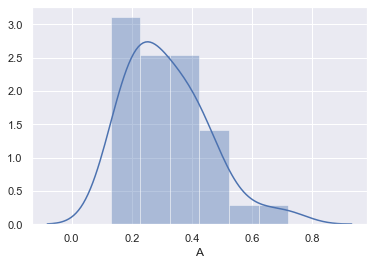

In [50]:
sns.distplot(ABS_A['A'])

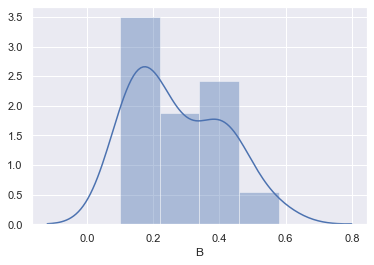

In [51]:
sns.distplot(ABS_B['B'])